# Trabalho Computacional - Regressão Linear

Bruno Barros Xavier - 200015621

Mateus Torres de Souza - 130015032

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

2023-10-03 15:56:08.179533: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-03 15:56:08.235864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 15:56:08.409290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 15:56:08.409319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 15:56:08.410051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

## Leitura do Arquivo e Pré-processamento

In [4]:
data = pd.read_csv("winequalityN.csv")

# Substituir white e red por numeros
mapping = {'white': 1.0, 'red': 0.0}
data['type'] = data['type'].replace(mapping)

mean_total = data.stack().mean()

# Substituir NaN pela média total
data_filled = data.fillna(mean_total)


X = data_filled.drop(columns=['quality'])  # Variáveis de entrada
y = data_filled['quality']                 # Variáveis de saida

X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,0.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,13.962857,11.2
6494,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


## Definindo a função de perda e implementando o SGD dos minibatch


A classe MeanSquaredError calcula o erro quadrático médio retornando a perda média dos exemplos.

A classe


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),  # Camada de entrada
    tf.keras.layers.Dense(1, kernel_initializer = tf.initializers.RandomNormal(stddev=0.01))  # Camada de saída com um neurônio para a regressão
])

# Gradiente Descendente Estocástico (SGD) e MSE para regressão
opt = tf.keras.optimizers.SGD(clipnorm=1.) 
fn = tf.keras.losses.MeanSquaredError()

# Compilar o modelo
model.compile(loss=fn, optimizer=opt) 

# Treinar o modelo
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
163/163 [==============================] - 1s 2ms/step - loss: 4.0685 - val_loss: 6.7412
Epoch 2/20
163/163 [==============================] - 0s 1ms/step - loss: 2.1705 - val_loss: 1.9586
Epoch 3/20
163/163 [==============================] - 0s 1ms/step - loss: 1.6362 - val_loss: 1.4787
Epoch 4/20
163/163 [==============================] - 0s 1ms/step - loss: 1.4349 - val_loss: 0.8167
Epoch 5/20
163/163 [==============================] - 0s 969us/step - loss: 1.2335 - val_loss: 0.6659
Epoch 6/20
163/163 [==============================] - 0s 934us/step - loss: 1.2178 - val_loss: 0.5531
Epoch 7/20
163/163 [==============================] - 0s 957us/step - loss: 1.2373 - val_loss: 0.7832
Epoch 8/20
163/163 [==============================] - 0s 957us/step - loss: 1.1960 - val_loss: 0.5312
Epoch 9/20
163/163 [==============================] - 0s 946us/step - loss: 1.1791 - val_loss: 0.7906
Epoch 10/20
163/163 [==============================] - 0s 965us/step - loss: 1.2041 - val_

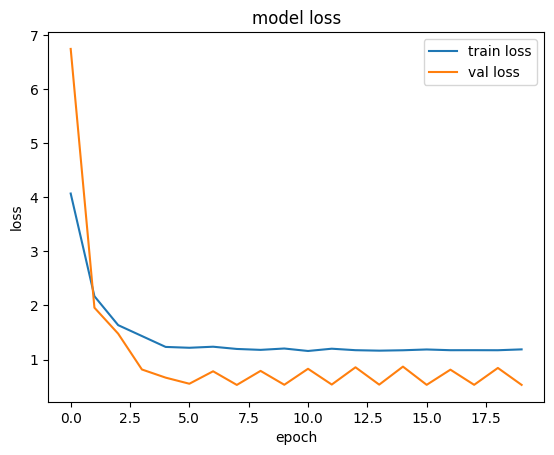

Pesos: [[ 0.01962095]
 [ 0.12368275]
 [-0.00494556]
 [ 0.0038052 ]
 [ 0.01629411]
 [ 0.01135873]
 [ 0.00940512]
 [-0.00689188]
 [ 0.01417185]
 [ 0.07734576]
 [ 0.01084627]
 [ 0.33096886]]
Viés: [1.0404209]
41/41 [==============================] - 0s 1ms/step - loss: 1.0499
Erro Médio Quadrado (MSE) nos dados de teste: 1.049882411956787
41/41 [==============================] - 0s 665us/step


In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss', "val acc"])
plt.show()


weights, bias = model.layers[0].get_weights()
print('Pesos:', weights)
print('Viés:', bias)


# Dividindo variaveis de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

# Avaliar o modelo com os dados de teste
loss = model.evaluate(X_test, y_test)
print(f'Erro Médio Quadrado (MSE) nos dados de teste: {loss}')

# Fazer previsões com o modelo treinado
predictions = model.predict(X_test)

## Melhorando

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Camada de entrada
    tf.keras.layers.Dense(1, kernel_initializer = tf.initializers.RandomNormal(stddev=0.01))  # Camada de saída com um neurônio para a regressão
])


# Gradiente Descendente Estocástico (SGD) e MSE para regressão
opt = tf.keras.optimizers.SGD(0.001, clipnorm=1.) 
fn = tf.keras.losses.MeanSquaredError()

# Compilar o modelo
model.compile(loss=fn, optimizer=opt) 

# Treinar o modelo
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
163/163 [==============================] - 0s 1ms/step - loss: 11.6613 - val_loss: 12.8605
Epoch 2/20
163/163 [==============================] - 0s 961us/step - loss: 3.3117 - val_loss: 9.5557
Epoch 3/20
163/163 [==============================] - 0s 976us/step - loss: 2.5474 - val_loss: 6.1487
Epoch 4/20
163/163 [==============================] - 0s 920us/step - loss: 1.9086 - val_loss: 3.8177
Epoch 5/20
163/163 [==============================] - 0s 975us/step - loss: 1.4805 - val_loss: 2.7317
Epoch 6/20
163/163 [==============================] - 0s 940us/step - loss: 1.1771 - val_loss: 1.6585
Epoch 7/20
163/163 [==============================] - 0s 944us/step - loss: 0.9533 - val_loss: 0.9812
Epoch 8/20
163/163 [==============================] - 0s 1ms/step - loss: 0.8172 - val_loss: 0.6783
Epoch 9/20
163/163 [==============================] - 0s 1ms/step - loss: 0.7353 - val_loss: 0.5959
Epoch 10/20
163/163 [==============================] - 0s 966us/step - loss: 0.7007 - 

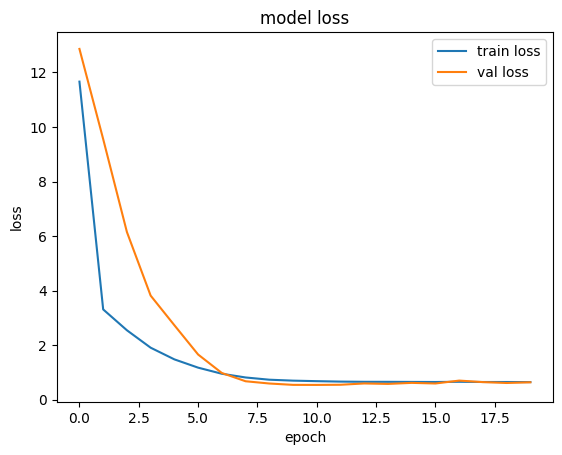

Pesos: [[ 0.02455733]
 [ 0.14121766]
 [-0.01165052]
 [ 0.01148583]
 [ 0.01453389]
 [-0.01964387]
 [ 0.01162124]
 [-0.00081879]
 [ 0.00780359]
 [ 0.08235678]
 [ 0.01245457]
 [ 0.33637905]]
Viés: [0.81352913]
41/41 [==============================] - 0s 866us/step - loss: 0.6191
Erro Médio Quadrado (MSE) nos dados de teste: 0.6191036105155945


In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'])
plt.show()


weights, bias = model.layers[0].get_weights()
print('Pesos:', weights)
print('Viés:', bias)

# Avaliar o modelo com os dados de teste
loss = model.evaluate(X_test, y_test)
print(f'Erro Médio Quadrado (MSE) nos dados de teste: {loss}')